# Hector FC 
## $\partial M \alpha T$ - UFMT 

In [1]:
using LaTeXStrings, LinearAlgebra, Random, SparseArrays, Statistics
using OrdinaryDiffEq
using Parameters, Plots
using Colors
using Random
using Images 

# 🤔 Modelos epidemiológicos 

[Mosquito](https://www.gatesnotes.com/Most-Deadly-Animal-Mosquito-Week-2016?platform=hootsuite)


<img 
src="https://media.istockphoto.com/id/1327212955/pt/foto/close-up-mosquito-and-stop-sign.jpg?s=2048x2048&w=is&k=20&c=EnY8F7nmAxe4lrZ735DamD88cnYendPcasRDXR68yy0=" 
alt="Image Test" 
style="width:500px">







## 😼 Modelo  SIR 





- ***Suscetíveis***: indivíduos que não estão infectados, e podem contrair a doença através de contatos com infectados.
- ***Infectados***: indivíduos que estão com a doença e podem transmití-la para outros indivíduos
- ***Recuperados***: indivíduos que passaram pela doença e não são mais nem suscetíveis nem infectados. Considera-se que a cura confere imunidade.



\begin{align}
s+i+r= 1, \text{ onde }  s=s(t), i=i(t), r=r(t)
\end{align}


\begin{cases}
\dot{s} & = - \beta\cdot s \cdot i && s(t_{0}) =s_{o}  \\
\dot{i} & = \beta\,s\,i -\gamma\,i  && i(t_{0}) =i_{o} \\
\dot{r} & = \gamma\,i  && r(t_{0}) = r_{o} 
\end{cases}



como  $r = 1 - i - s$ 


\begin{cases}
\dot{s} & = - \beta\cdot s \cdot i && s(t_{0}) =s_{o}  \\
\dot{i} & = \beta\,s\,i -\gamma\,i  && i(t_{0}) =i_{o} \\
\end{cases}

denotemos  
\begin{align}
F(s,i)&= (F_{1}(s,i),F_{2}(s,i))  \\
      &= (- \beta\cdot s \cdot i, \beta\,s\,i -\gamma\,i )
\end{align}


In [2]:
β = 0.1
γ= 0.05 
R_0 = β/γ

2.0

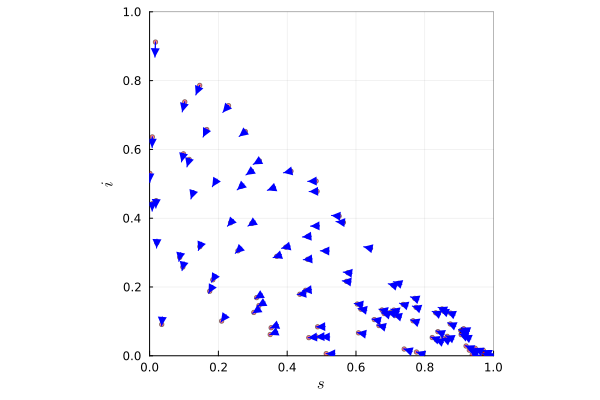

In [3]:
# as: arrow head size 0-1 (fraction of arrow length)
# la: arrow alpha transparency 0-1
function arrow0(x, y, u, v; as=0.07, lc=:black, la=1)           
    plot!([x,x+u],[y,y+v],lc=lc,la=1,arrow=(:closed, 2.0),labels=false )     
end


F1(s,i) = -β*s*i 
F2(s,i) =β*s*i-γ*i  # points   # arrows 

N = 100;
x = 0 .+ rand(N) 
y = 0 .+ (1 .-x).*rand(N)  # points
u,v = F1.(x,y), F2.(x,y)

# plot points and arrows with 10% head sizes
scatter(x, y, mc=:red, ms=2.5, ratio=1, ma=0.5,labels=false  )

arrow0.(x, y, u, v; as=0.1, lc=:blue, la=1)
plot!(
xlims=(0,1),ylims=(0,1),
xlabel = L"s",
ylabel = L"i",
framestyle = :semi,
)



In [4]:
function SIR(x, p, t; β=0.2, γ=0.05 )
    s, i, r = x
    return [-β*s*i;      # ds/dt   
             β*s*i-γ*i;  # di/dt              
             γ*i;        # dr/dt = γi 
    ]
end

SIR (generic function with 1 method)

In [5]:
i_0 = 1E-4
s_0 = 1.0- i_0 
r_0 = 0.0
x_0 = [s_0, i_0, r_0]

tspan = (0.0, 350.0)  # ≈ 350 days
prob = ODEProblem(SIR, x_0, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 350.0)
u0: 3-element Vector{Float64}:
 0.9999
 0.0001
 0.0

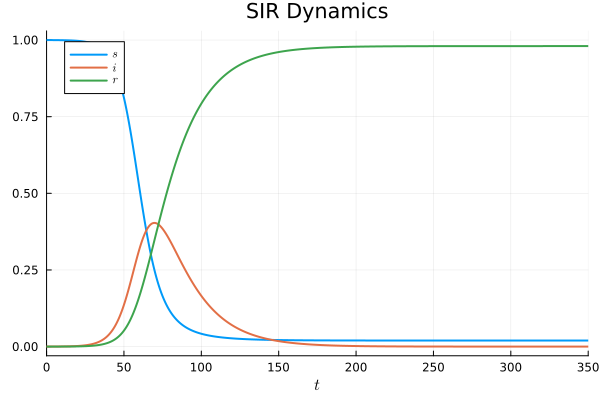

In [6]:
sol = solve(prob, Tsit5())
plot(sol, labels = [ L"s" L"i" L"r"], title = "SIR Dynamics", lw = 2, xlabel = L"t")


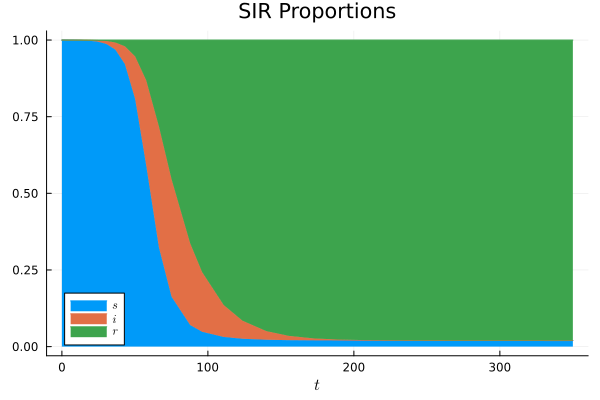

In [7]:
areaplot(sol.t, sol', labels = [L"s"  L"i" L"r"], title = "SIR Proportions", xlabel = L"t")

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


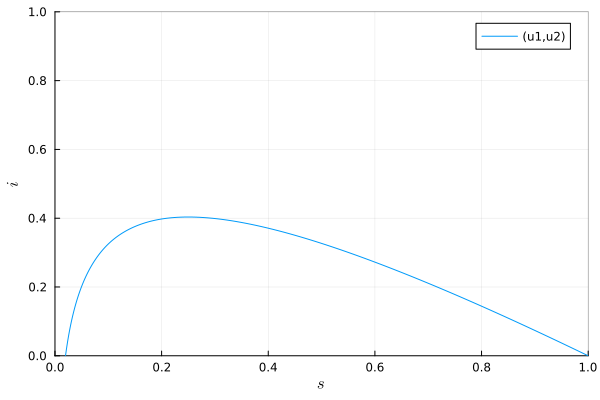

In [8]:
plot(sol,vars=(1,2),
    xlims=(0,1),ylims=(0,1),
    xlabel = L"s",
    ylabel = L"i",
    framestyle = :semi,
)


# Automato Celular unidimensional na natureza 

## Automato Celular unidimensional na natureza 

<img 
src="https://mathworld.wolfram.com/images/eps-svg/ElementaryCARule030_1000.svg" 
alt="Image Test" 
style="width:500px">

[wikipedia](https://en.wikipedia.org/wiki/Conus_textile)

In [9]:
ncol = 401
# number of rows 
nrow =  ncol
locM = div(ncol,2)
St = zeros(Int,ncol)
evoM = zeros(Int,nrow,ncol)
St[locM] = 1 


1

In [10]:
function zp(spM,St)    
    nrow,ncol = size(spM)
    nextSt = zeros(Int,ncol)    
    for i in 1:nrow
      spM[i,:] = copy(St)      
      for j in 2:ncol-1
        nextSt[j]= mod(St[j-1] + St[j] + St[j+1],2)
      end 
      nextSt[1]   = mod(St[ncol] + St[1] + St[2],2)
      nextSt[ncol]= mod(St[ncol-1] + St[ncol] + St[1],2)
      St = copy(nextSt)         
    end
    return spM 
end


zp (generic function with 1 method)

In [11]:
#evoM
#mod(ncol+1,ncol)
d1 = zp(evoM,St); 

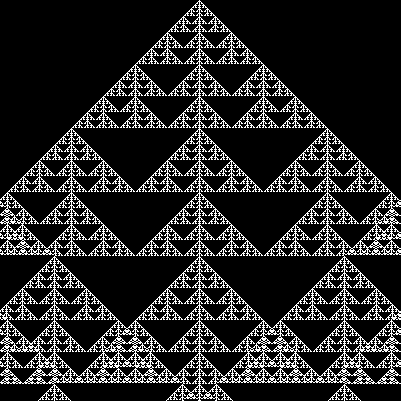

In [12]:
p1 = Gray.(d1)




|  1 | 2 | 3 | 4 | 5 | 6 |7 | 8 |
|---|---|---|---|---|---|---|---|
|111|110|101|011|100|010|001|000|
| 0 | 1 | 1 | 1 | 0 | 1 | 1 |1  |




 

In [13]:
ncol = 300
# number of rows 
nrow =  ncol
locM = div(ncol,2)
St = zeros(Int,ncol)
evoM = zeros(Int,nrow,ncol)
St[locM] = 1 

1

In [14]:
function zpW(spM,St,num)    
    nrow,ncol = size(spM)
    nextSt = zeros(Int,ncol)  
    d1= digits(num,base=2,pad=8)
    for i in 1:nrow
        spM[i,:] = St
        perm=[[ii,jj,kk] for ii=0:1,jj=0:1,kk=0:1]            
        #====================#
        for j in 2:ncol-1
            for ip=1:length(perm)
                if St[j-1:j+1]==perm[ip]
                    nextSt[j]= d1[ip]
                end
            end    
        end        
        #====================#
        nextSt[1]   = mod(St[ncol] + St[1] + St[2],2)
        nextSt[ncol]= mod(St[ncol-1] + St[ncol] + St[1],2)
        St =copy(nextSt)         
    end
    return spM 
end

zpW (generic function with 1 method)

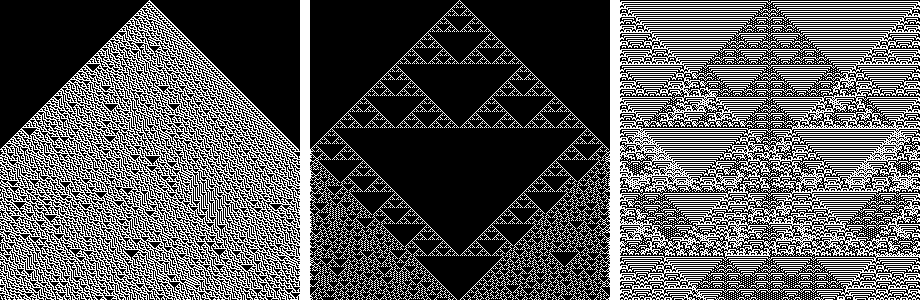

In [15]:
#cW = zpW(evoM,St,30) 
mosaic( Gray.(zpW(evoM,St,30)), Gray.(zpW(evoM,St,18)), Gray.(zpW(evoM,St,105)); nrow=1,fillvalue =1, npad=10 )

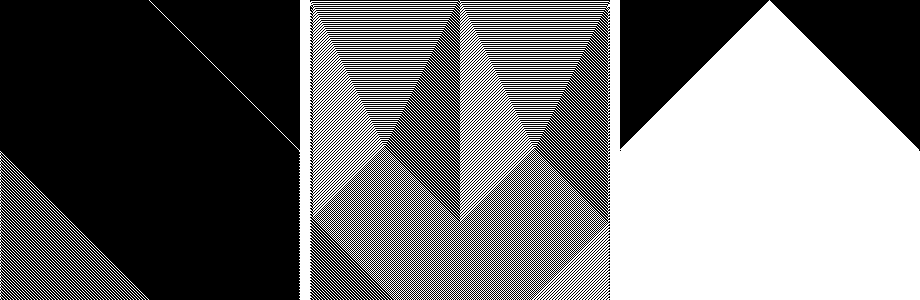

In [16]:
mosaic( Gray.(zpW(evoM,St,66)), Gray.(zpW(evoM,St,99)), Gray.(zpW(evoM,St,254)); nrow=1,fillvalue =1, npad=10)

<img 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Textile_cone.JPG/220px-Textile_cone.JPG" 
alt="Image Test" 
style="width:500px">

##  Two dimensional case 

In [17]:

function _get(A::Matrix{T}, i::Int, j::Int)::T where T<:Number
    r,c = size(A)
    if (1<=i<=r) && (1<=j<=c)
        return @inbounds A[i,j]
    end    
    i = mod(i,r)
    j = mod(j,c)
    if i==0
        i=r
    end
    if j==0
        j=c
    end
    return @inbounds A[i,j]
end

function new_entry(A::Matrix{Int},i::Int,j::Int)
    nc = sum(_get(A,p,q) for p=i-1:i+1 for q=j-1:j+1 if (p,q) != (i,j))
    if A[i,j]==0
        if nc==3
            return 1
        else
            return 0
        end
    end
    if nc==2 || nc==3
        return 1
    else
        return 0
    end
end

function nextEv2D(A::Matrix{Int})::Matrix{Int}
    r,c = size(A)
    B = zeros(Int,r,c)
    for i=1:r
        for j=1:c
            @inbounds B[i,j] = new_entry(A,i,j)
        end
    end
    return B
end


nextEv2D (generic function with 1 method)

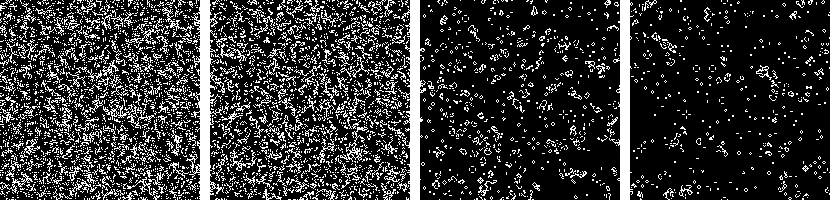

In [18]:
# initial condition


function numSt(num::Int) 
    rng = MersenneTwister(1234)
    ncol = 200
    nrow = ncol
    ev2D = zeros(Int,nrow,ncol)
    
    loc = div(ncol,2)
    #ev2D[loc-2:loc+2,loc-2:loc+2] = Int.(bitrand(rng,5,5))      
    ev2D = Int.(bitrand(rng,ncol,ncol)) 
    for i=1:num
       nextev2D = (nextEv2D(ev2D))
       ev2D =copy(nextev2D)
    end
   return ev2D         
end 

mosaic( Gray.(numSt(1)), Gray.(numSt(2)), Gray.(numSt(100)), Gray.(numSt(500)); fillvalue =1, npad=10, nrow=1)


# Outras 

## Data Science 

<img 
src="https://images.unsplash.com/photo-1543286386-713bdd548da4?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80
" 
alt="Image Test" 
style="width:500px">

## Optimização teorica e Numerica 

## Modelagem Matemática 



